# Лабораторная работа #1
Вариант #2

Искендеров А.С.

In [139]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [140]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns

---

In [ ]:
df = pd.read_csv("train1.csv")
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


В некоторых столбцах содержатся оценки в виде букв. Найдём все возможные
значения для таких столбцов.

In [142]:
set(df["Ecology_2"].unique()) | set(df["Ecology_3"].unique()) | set(df["Shops_2"].unique())

{'A', 'B'}

В столбцах с буквами содержится либо символ `A`, либо `B`. Превратим их в
числа `1` и `0`.

In [143]:
dct = defaultdict(lambda: pd.NA)
dct['A'] = 1
dct['B'] = 2

df["Ecology_2"] = df["Ecology_2"].map(lambda x: dct[x])
df["Ecology_3"] = df["Ecology_3"].map(lambda x: dct[x])
df["Shops_2"] = df["Shops_2"].map(lambda x: dct[x])

df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,2,2,11,3097,0,NaN,0,0,2,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,2,2,30,6207,1,1183.0,1,0,2,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,2,2,33,5261,0,240.0,3,1,2,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,2,2,1,264,0,NaN,0,1,2,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,2,2,33,8667,2,NaN,0,6,2,343995.102962


Теперь мы можем построить график зависимостей столбцов таблицы друг от
друга.

<Axes: >

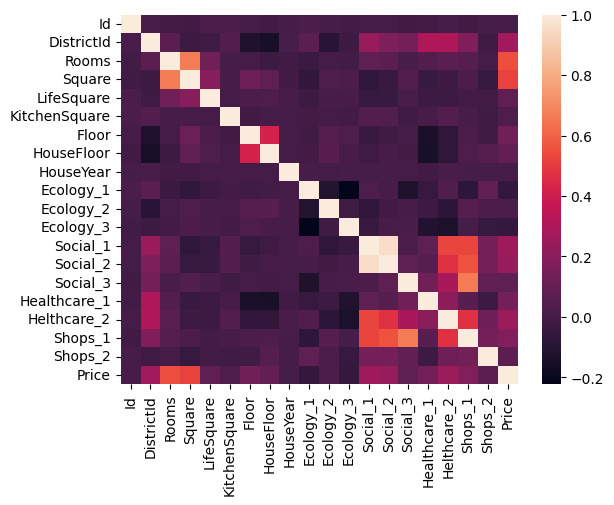

In [144]:
corr = df.corr()
sns.heatmap(
    corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

На графике можно заметить, что от цены больше всего зависят такие
столбцы, как `DistrictId`, `Rooms`, `Square`, `Social_1`, `Social_2` и
`Helthcare_2`. При реализации модели линейной регресии мы будем
опираться именно на эти данные.

Перед тренировкой модели нам стоит избавиться от выбросов.

In [145]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["Price"] > lower_bound) & (df["Price"] < upper_bound)]

df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,2,2,11,3097,0,NaN,0,0,2,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,2,2,30,6207,1,1183.0,1,0,2,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,2,2,33,5261,0,240.0,3,1,2,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,2,2,1,264,0,NaN,0,1,2,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,2,2,33,8667,2,NaN,0,6,2,343995.102962


Приступаем к тренировке модели.

In [146]:
# Заранее разделим данные на тренировочные и тестовые
# X = [df["DistrictId"], df["Rooms"], df["Square"], df["Social_1"], df["Social_2"], df["Helthcare_2"]]
# y = [df["Price"]] * 6
X = df[["DistrictId", "Rooms", "Square", "Social_1", "Social_2", "Helthcare_2"]]
y = df[["Price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, train_size=0.2, random_state=42)

lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)  # Перед запуском включайте вентиляторы

LinearRegression()

Проверим метрики качества.

In [147]:
y_pred = lrmodel.predict(X_test)
y_pred = list(map(lambda x: x[0], y_pred))

{
    "MSE": mean_squared_error(y_test, y_pred),
    "RMSE": root_mean_squared_error(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "R^2": lrmodel.score(X_train, y_train)
}

{'MSE': 2893767725.2686987,
 'RMSE': 53793.75173074191,
 'MAE': 38003.68192568395,
 'R^2': 0.41150110433264475}

Для сравнения выведем среднюю цену недвижимости (вместе со всеми другими характеристиками).

In [148]:
df["Price"].describe()

count      9417.000000
mean     198439.986670
std       68677.236826
min       59174.778028
25%      151028.428278
50%      187599.924231
75%      236647.781363
max      391982.648184
Name: Price, dtype: float64

Среднее значение цены недвижимости: 198 тыс. Средняя абсолютная ошибка:
38 тыс. - почти 20%. Это говорит о неспособности модели точно
предсказывать цены.

Построим график "истинные значения - предсказанные значения".

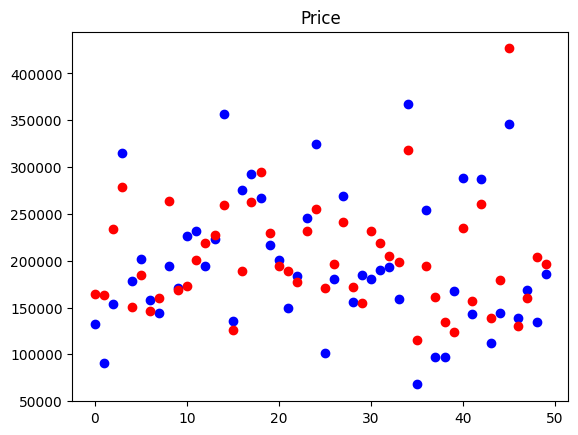

In [149]:
slc = slice(0, 50)
plt.scatter(range(len(y_test[slc])), y_test[slc], color='blue')
plt.scatter(range(len(y_pred[slc])), y_pred[slc], color='red')
plt.title("Price")
plt.show()

Похлопаем себя по пузику.